# Assignment 2

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn import datasets
import pandas as pd
from sklearn import preprocessing

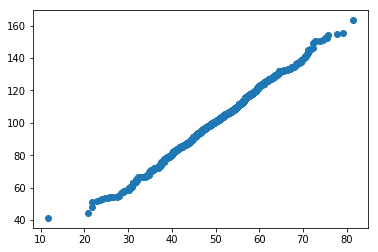

In [19]:
x = np.random.normal(50, 10, size = 1000)
x = np.sort(x)
y = np.random.normal(100, 20, size = 1000)
y = np.sort(y)
plt.scatter( x,y)

In [3]:
#Creating pandas dataframe
data = pd.DataFrame(columns = ['x', 'y'], index = range(1, 1001))
#populating dataframe with data
for row in data.index:
    data.loc[row, 'x'] = np.random.normal(0, 1) #less variance
    data.loc[row, 'y'] = np.random.normal(0, 10) #more variance
data.head()

,x,y
1,0.367584,7.87482
2,-0.354839,3.41546
3,-0.317268,-4.71747
4,1.69502,-10.2705
5,0.264348,0.776023


In [21]:
for row in data.index:
    data.loc[row, 'x'] = np.random.normal(0, 1)
    data.loc[row, 'y'] = np.random.normal(0, 10)
data.head()

,x,y
1,2.02848,-16.119
2,0.107823,8.06524
3,0.805249,6.09416
4,-0.473591,-3.4744
5,0.0537209,6.90334


In [4]:
#Create PCA Object
pca = PCA()
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [5]:
pca_data = pca.transform(data)

In [6]:
pca_data

array([[-7.87900962,  0.32905507],
       [-3.41867234, -0.38729847],
       [ 4.71419742, -0.33866055],
       ...,
       [15.07047513, -0.31802482],
       [ 2.6427196 , -0.58420537],
       [ 6.01128537, -0.6910027 ]])

In [7]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals = 1)
labels = ['PC'+str(x) for x in range(1, len(per_var) + 1)]

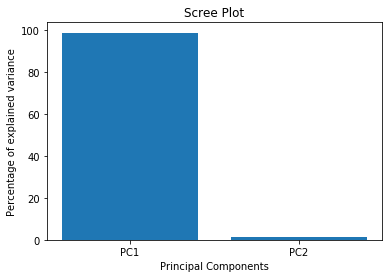

In [8]:
#Scree plot to look at percentage variance captured
plt.bar(x = range(1, len(per_var) + 1), height = per_var, tick_label = labels)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.show()

In [9]:
per_var

array([98.9,  1.1])

In [10]:
pca.explained_variance_ratio_

array([0.98921168, 0.01078832])

In [11]:
pca.components_

array([[-0.00136082, -0.99999907],
       [ 0.99999907, -0.00136082]])

In [12]:
len(pca.components_[0])

2

In [17]:
loading_scores = pd.Series(pca.components_[0], index = ['x', 'y'])
loading_scores

x   -0.001361
y   -0.999999
dtype: float64

Text(0.5, 1.0, 'First PC')

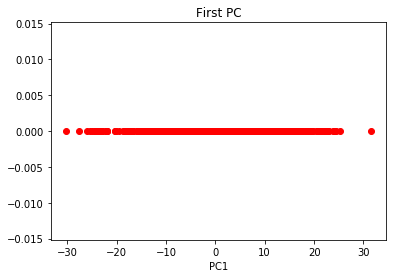

In [18]:
plt.scatter(pca_data[:, 0], np.zeros(1000), color = 'red')
plt.xlabel('PC1')
plt.title('First PC')

In [16]:
#reconstruct PC onto original datapoints
y_new = np.linspace(np.min(y), np.max(y), len(y))

NameError: name 'y' is not defined

In [15]:
plt.scatter(np.sort(pca_data[:, 0]), y_new, color = 'blue')
plt.xlabel('PC1')
plt.title('First PC')

NameError: name 'y_new' is not defined

In [19]:
pca_data

array([[-7.87900962,  0.32905507],
       [-3.41867234, -0.38729847],
       [ 4.71419742, -0.33866055],
       ...,
       [15.07047513, -0.31802482],
       [ 2.6427196 , -0.58420537],
       [ 6.01128537, -0.6910027 ]])

(-3.1901560987387696,
 3.589177616472764,
 -34.54583516127652,
 33.249056452861765)

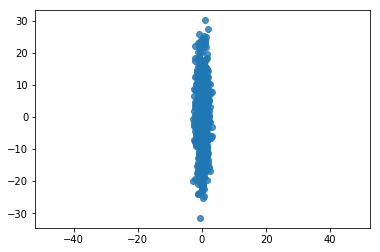

In [25]:
data_new = pca.inverse_transform(pca_data)
plt.scatter(data_new[:, 0], data_new[:, 1], alpha = 0.8)
plt.axis('equal')

In [48]:
seed = np.random.RandomState(3)

#seed.randn(2, 20)
seed.rand(2, 20)

array([[0.5507979 , 0.70814782, 0.29090474, 0.51082761, 0.89294695,
        0.89629309, 0.12558531, 0.20724288, 0.0514672 , 0.44080984,
        0.02987621, 0.45683322, 0.64914405, 0.27848728, 0.6762549 ,
        0.59086282, 0.02398188, 0.55885409, 0.25925245, 0.4151012 ],
       [0.28352508, 0.69313792, 0.44045372, 0.15686774, 0.54464902,
        0.78031476, 0.30636353, 0.22195788, 0.38797126, 0.93638365,
        0.97599542, 0.67238368, 0.90283411, 0.84575087, 0.37799404,
        0.09221701, 0.6534109 , 0.55784076, 0.36156476, 0.2250545 ]])

In [49]:
np.dot(seed.rand(2, 2), seed.randn(2, 1000))

array([[ 0.28617813, -0.24776668, -1.62539683, ..., -1.05613279,
         0.21673661,  0.73962891],
       [ 0.19637302, -0.156318  , -1.03781702, ..., -0.67870294,
         0.16332227,  0.49523304]])